# Data Visualization Using Seaborn library

In [1]:
# import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
Client_Data = pd.read_csv('E:/Enefit_Data/predict-energy-behavior-of-prosumers/client.csv')
Client_Data.head(10)

,product_type,county,eic_count,installed_capacity,is_business,date,data_block_id
0,1,0,108,952.89,0,2021-09-01,2
1,2,0,17,166.40,0,2021-09-01,2
2,3,0,688,7207.88,0,2021-09-01,2
3,0,0,5,400.00,1,2021-09-01,2
4,1,0,43,1411.00,1,2021-09-01,2
5,3,0,265,13417.79,1,2021-09-01,2
6,1,1,7,80.00,0,2021-09-01,2
7,3,1,42,472.60,0,2021-09-01,2
8,3,1,12,295.50,1,2021-09-01,2
9,3,2,33,414.50,0,2021-09-01,2


In [3]:
Train_Data = pd.read_csv('E:/Enefit_Data/predict-energy-behavior-of-prosumers/train.csv')
Train_Data.head(10)

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0
2,0,0,2,0.000,0,2021-09-01 00:00:00,0,2,1
3,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1
4,0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2
5,0,0,3,656.859,1,2021-09-01 00:00:00,0,5,2
6,0,1,0,0.000,0,2021-09-01 00:00:00,0,6,3
7,0,1,0,59.000,1,2021-09-01 00:00:00,0,7,3
8,0,1,1,0.000,0,2021-09-01 00:00:00,0,8,4
9,0,1,1,501.760,1,2021-09-01 00:00:00,0,9,4


In [4]:
Train_Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018352 entries, 0 to 2018351
Data columns (total 9 columns):
 #   Column              Dtype  
---  ------              -----  
 0   county              int64  
 1   is_business         int64  
 2   product_type        int64  
 3   target              float64
 4   is_consumption      int64  
 5   datetime            object 
 6   data_block_id       int64  
 7   row_id              int64  
 8   prediction_unit_id  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 138.6+ MB


In [5]:
Train_Data_List = Train_Data.columns
Train_Data_List = Train_Data_List.drop (['target','datetime'])
Train_Data_List


Index(['county', 'is_business', 'product_type', 'is_consumption',
       'data_block_id', 'row_id', 'prediction_unit_id'],
      dtype='object')

# Changing int and float Datatypes

In [6]:
Train_Data[Train_Data_List]= Train_Data[Train_Data_List].astype('int16')
Train_Data['target']= Train_Data['target'].astype('float32')
Train_Data [['date','time']] = Train_Data['datetime'].str.split (' ',n=1,expand=True)
Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018352 entries, 0 to 2018351
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   county              int16  
 1   is_business         int16  
 2   product_type        int16  
 3   target              float32
 4   is_consumption      int16  
 5   datetime            object 
 6   data_block_id       int16  
 7   row_id              int16  
 8   prediction_unit_id  int16  
 9   date                object 
 10  time                object 
dtypes: float32(1), int16(7), object(3)
memory usage: 80.8+ MB


In [7]:
Client_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41919 entries, 0 to 41918
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_type        41919 non-null  int64  
 1   county              41919 non-null  int64  
 2   eic_count           41919 non-null  int64  
 3   installed_capacity  41919 non-null  float64
 4   is_business         41919 non-null  int64  
 5   date                41919 non-null  object 
 6   data_block_id       41919 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 2.2+ MB


In [8]:
Client_Data_List = Client_Data.columns
Client_Data_List = Client_Data_List.drop (['installed_capacity','date'])
Client_Data_List

Index(['product_type', 'county', 'eic_count', 'is_business', 'data_block_id'], dtype='object')

In [9]:
Client_Data[Client_Data_List]= Client_Data[Client_Data_List].astype('int16')
Client_Data['installed_capacity']= Client_Data['installed_capacity'].astype('float32')
Client_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41919 entries, 0 to 41918
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_type        41919 non-null  int16  
 1   county              41919 non-null  int16  
 2   eic_count           41919 non-null  int16  
 3   installed_capacity  41919 non-null  float32
 4   is_business         41919 non-null  int16  
 5   date                41919 non-null  object 
 6   data_block_id       41919 non-null  int16  
dtypes: float32(1), int16(5), object(1)
memory usage: 900.7+ KB


In [10]:
merged_Combined_Data1 = pd.merge(Train_Data,Client_Data, on=['county','is_business', 'product_type', 'date'], how = 'left')
merged_Combined_Data1

,county,is_business,product_type,target,is_consumption,datetime,data_block_id_x,row_id,prediction_unit_id,date,time,eic_count,installed_capacity,data_block_id_y
0,0,0,1,0.713000,0,2021-09-01 00:00:00,0,0,0,2021-09-01,00:00:00,108.0,952.890015,2.0
1,0,0,1,96.589996,1,2021-09-01 00:00:00,0,1,0,2021-09-01,00:00:00,108.0,952.890015,2.0
2,0,0,2,0.000000,0,2021-09-01 00:00:00,0,2,1,2021-09-01,00:00:00,17.0,166.399994,2.0
3,0,0,2,17.313999,1,2021-09-01 00:00:00,0,3,1,2021-09-01,00:00:00,17.0,166.399994,2.0
4,0,0,3,2.904000,0,2021-09-01 00:00:00,0,4,2,2021-09-01,00:00:00,688.0,7207.879883,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018347,15,1,0,197.233002,1,2023-05-31 23:00:00,637,-13269,64,2023-05-31,23:00:00,NaN,NaN,NaN
2018348,15,1,1,0.000000,0,2023-05-31 23:00:00,637,-13268,59,2023-05-31,23:00:00,NaN,NaN,NaN
2018349,15,1,1,28.403999,1,2023-05-31 23:00:00,637,-13267,59,2023-05-31,23:00:00,NaN,NaN,NaN
2018350,15,1,3,0.000000,0,2023-05-31 23:00:00,637,-13266,60,2023-05-31,23:00:00,NaN,NaN,NaN


# Reading json File 

In [11]:
CountyName = pd.read_json('E:\Enefit_Data\predict-energy-behavior-of-prosumers\county_id_to_name_map.json',orient='index')
CountyName

,0
0,HARJUMAA
1,HIIUMAA
2,IDA-VIRUMAA
3,JÄRVAMAA
4,JÕGEVAMAA
5,LÄÄNE-VIRUMAA
6,LÄÄNEMAA
7,PÄRNUMAA
8,PÕLVAMAA
9,RAPLAMAA


In [12]:
CountyName['county'] = CountyName.index
CountyName['county_name'] = CountyName[0]
#CountyName[].rename('county_name', inplace = True)
#CountyName.drop[0]
CountyName=CountyName[['county','county_name']]
CountyName

,county,county_name
0,0,HARJUMAA
1,1,HIIUMAA
2,2,IDA-VIRUMAA
3,3,JÄRVAMAA
4,4,JÕGEVAMAA
5,5,LÄÄNE-VIRUMAA
6,6,LÄÄNEMAA
7,7,PÄRNUMAA
8,8,PÕLVAMAA
9,9,RAPLAMAA


In [13]:
merged_Combined_Data2 = pd.merge(merged_Combined_Data1,CountyName, on=['county'], how = 'left')
merged_Combined_Data2

,county,is_business,product_type,target,is_consumption,datetime,data_block_id_x,row_id,prediction_unit_id,date,time,eic_count,installed_capacity,data_block_id_y,county_name
0,0,0,1,0.713000,0,2021-09-01 00:00:00,0,0,0,2021-09-01,00:00:00,108.0,952.890015,2.0,HARJUMAA
1,0,0,1,96.589996,1,2021-09-01 00:00:00,0,1,0,2021-09-01,00:00:00,108.0,952.890015,2.0,HARJUMAA
2,0,0,2,0.000000,0,2021-09-01 00:00:00,0,2,1,2021-09-01,00:00:00,17.0,166.399994,2.0,HARJUMAA
3,0,0,2,17.313999,1,2021-09-01 00:00:00,0,3,1,2021-09-01,00:00:00,17.0,166.399994,2.0,HARJUMAA
4,0,0,3,2.904000,0,2021-09-01 00:00:00,0,4,2,2021-09-01,00:00:00,688.0,7207.879883,2.0,HARJUMAA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018347,15,1,0,197.233002,1,2023-05-31 23:00:00,637,-13269,64,2023-05-31,23:00:00,NaN,NaN,NaN,VÕRUMAA
2018348,15,1,1,0.000000,0,2023-05-31 23:00:00,637,-13268,59,2023-05-31,23:00:00,NaN,NaN,NaN,VÕRUMAA
2018349,15,1,1,28.403999,1,2023-05-31 23:00:00,637,-13267,59,2023-05-31,23:00:00,NaN,NaN,NaN,VÕRUMAA
2018350,15,1,3,0.000000,0,2023-05-31 23:00:00,637,-13266,60,2023-05-31,23:00:00,NaN,NaN,NaN,VÕRUMAA


In [14]:
merged_Combined_Data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018352 entries, 0 to 2018351
Data columns (total 15 columns):
 #   Column              Dtype  
---  ------              -----  
 0   county              int16  
 1   is_business         int16  
 2   product_type        int16  
 3   target              float32
 4   is_consumption      int16  
 5   datetime            object 
 6   data_block_id_x     int16  
 7   row_id              int16  
 8   prediction_unit_id  int16  
 9   date                object 
 10  time                object 
 11  eic_count           float64
 12  installed_capacity  float32
 13  data_block_id_y     float64
 14  county_name         object 
dtypes: float32(2), float64(2), int16(7), object(4)
memory usage: 134.7+ MB


In [15]:
merged_Combined_Data2['datetime']= pd.to_datetime(merged_Combined_Data2 ['datetime']) 

In [16]:
merged_Combined_Data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018352 entries, 0 to 2018351
Data columns (total 15 columns):
 #   Column              Dtype         
---  ------              -----         
 0   county              int16         
 1   is_business         int16         
 2   product_type        int16         
 3   target              float32       
 4   is_consumption      int16         
 5   datetime            datetime64[ns]
 6   data_block_id_x     int16         
 7   row_id              int16         
 8   prediction_unit_id  int16         
 9   date                object        
 10  time                object        
 11  eic_count           float64       
 12  installed_capacity  float32       
 13  data_block_id_y     float64       
 14  county_name         object        
dtypes: datetime64[ns](1), float32(2), float64(2), int16(7), object(3)
memory usage: 134.7+ MB


In [17]:
#Count
county_0 = merged_Combined_Data2.loc[(merged_Combined_Data2['county_name']=='VÕRUMAA')]
county_0

,county,is_business,product_type,target,is_consumption,datetime,data_block_id_x,row_id,prediction_unit_id,date,time,eic_count,installed_capacity,data_block_id_y,county_name
114,15,0,1,0.000000,0,2021-09-01 00:00:00,0,114,57,2021-09-01,00:00:00,10.0,83.199997,2.0,VÕRUMAA
115,15,0,1,5.524000,1,2021-09-01 00:00:00,0,115,57,2021-09-01,00:00:00,10.0,83.199997,2.0,VÕRUMAA
116,15,0,3,0.000000,0,2021-09-01 00:00:00,0,116,58,2021-09-01,00:00:00,61.0,918.200012,2.0,VÕRUMAA
117,15,0,3,59.366001,1,2021-09-01 00:00:00,0,117,58,2021-09-01,00:00:00,61.0,918.200012,2.0,VÕRUMAA
118,15,1,1,0.100000,0,2021-09-01 00:00:00,0,118,59,2021-09-01,00:00:00,7.0,325.000000,2.0,VÕRUMAA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018347,15,1,0,197.233002,1,2023-05-31 23:00:00,637,-13269,64,2023-05-31,23:00:00,NaN,NaN,NaN,VÕRUMAA
2018348,15,1,1,0.000000,0,2023-05-31 23:00:00,637,-13268,59,2023-05-31,23:00:00,NaN,NaN,NaN,VÕRUMAA
2018349,15,1,1,28.403999,1,2023-05-31 23:00:00,637,-13267,59,2023-05-31,23:00:00,NaN,NaN,NaN,VÕRUMAA
2018350,15,1,3,0.000000,0,2023-05-31 23:00:00,637,-13266,60,2023-05-31,23:00:00,NaN,NaN,NaN,VÕRUMAA


In [18]:
rslt_df = county_0.loc[(county_0['datetime'] >= '2021-01-01')
                     & (county_0['datetime'] <= '2022-01-01')]
rslt_df

,county,is_business,product_type,target,is_consumption,datetime,data_block_id_x,row_id,prediction_unit_id,date,time,eic_count,installed_capacity,data_block_id_y,county_name
114,15,0,1,0.000000,0,2021-09-01,0,114,57,2021-09-01,00:00:00,10.0,83.199997,2.0,VÕRUMAA
115,15,0,1,5.524000,1,2021-09-01,0,115,57,2021-09-01,00:00:00,10.0,83.199997,2.0,VÕRUMAA
116,15,0,3,0.000000,0,2021-09-01,0,116,58,2021-09-01,00:00:00,61.0,918.200012,2.0,VÕRUMAA
117,15,0,3,59.366001,1,2021-09-01,0,117,58,2021-09-01,00:00:00,61.0,918.200012,2.0,VÕRUMAA
118,15,1,1,0.100000,0,2021-09-01,0,118,59,2021-09-01,00:00:00,7.0,325.000000,2.0,VÕRUMAA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366173,15,1,0,199.589996,1,2022-01-01,122,-27043,64,2022-01-01,00:00:00,12.0,470.000000,124.0,VÕRUMAA
366174,15,1,1,0.000000,0,2022-01-01,122,-27042,59,2022-01-01,00:00:00,9.0,334.000000,124.0,VÕRUMAA
366175,15,1,1,54.443001,1,2022-01-01,122,-27041,59,2022-01-01,00:00:00,9.0,334.000000,124.0,VÕRUMAA
366176,15,1,3,0.000000,0,2022-01-01,122,-27040,60,2022-01-01,00:00:00,42.0,1533.699951,124.0,VÕRUMAA


In [19]:
temp_table = merged_Combined_Data2.drop(columns=['target','is_consumption','row_id']).drop_duplicates()
temp_table['production'] = merged_Combined_Data2.query("is_consumption==0")['target'].values
temp_table['consumption'] = merged_Combined_Data2.query("is_consumption==1")['target'].values
target_data = temp_table

### convert datetime
target_data['datetime'] = target_data['datetime'].values.astype('datetime64[h]')
target_data['date']= pd.to_datetime(target_data ['date']) 

target_data


,county,is_business,product_type,datetime,data_block_id_x,prediction_unit_id,date,time,eic_count,installed_capacity,data_block_id_y,county_name,production,consumption
0,0,0,1,2021-09-01 00:00:00,0,0,2021-09-01,00:00:00,108.0,952.890015,2.0,HARJUMAA,0.713,96.589996
2,0,0,2,2021-09-01 00:00:00,0,1,2021-09-01,00:00:00,17.0,166.399994,2.0,HARJUMAA,0.000,17.313999
4,0,0,3,2021-09-01 00:00:00,0,2,2021-09-01,00:00:00,688.0,7207.879883,2.0,HARJUMAA,2.904,656.859009
6,0,1,0,2021-09-01 00:00:00,0,3,2021-09-01,00:00:00,5.0,400.000000,2.0,HARJUMAA,0.000,59.000000
8,0,1,1,2021-09-01 00:00:00,0,4,2021-09-01,00:00:00,43.0,1411.000000,2.0,HARJUMAA,0.000,501.760010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018342,15,0,1,2023-05-31 23:00:00,637,57,2023-05-31,23:00:00,NaN,NaN,NaN,VÕRUMAA,0.004,42.401001
2018344,15,0,3,2023-05-31 23:00:00,637,58,2023-05-31,23:00:00,NaN,NaN,NaN,VÕRUMAA,2.287,117.332001
2018346,15,1,0,2023-05-31 23:00:00,637,64,2023-05-31,23:00:00,NaN,NaN,NaN,VÕRUMAA,0.000,197.233002
2018348,15,1,1,2023-05-31 23:00:00,637,59,2023-05-31,23:00:00,NaN,NaN,NaN,VÕRUMAA,0.000,28.403999


# Selecting Harjumaa

In [20]:
rslt_df_HA = target_data.loc[(target_data['county_name']=='HARJUMAA')]

rslt_df_HA


,county,is_business,product_type,datetime,data_block_id_x,prediction_unit_id,date,time,eic_count,installed_capacity,data_block_id_y,county_name,production,consumption
0,0,0,1,2021-09-01 00:00:00,0,0,2021-09-01,00:00:00,108.0,952.890015,2.0,HARJUMAA,0.713000,96.589996
2,0,0,2,2021-09-01 00:00:00,0,1,2021-09-01,00:00:00,17.0,166.399994,2.0,HARJUMAA,0.000000,17.313999
4,0,0,3,2021-09-01 00:00:00,0,2,2021-09-01,00:00:00,688.0,7207.879883,2.0,HARJUMAA,2.904000,656.859009
6,0,1,0,2021-09-01 00:00:00,0,3,2021-09-01,00:00:00,5.0,400.000000,2.0,HARJUMAA,0.000000,59.000000
8,0,1,1,2021-09-01 00:00:00,0,4,2021-09-01,00:00:00,43.0,1411.000000,2.0,HARJUMAA,0.000000,501.760010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018226,0,0,3,2023-05-31 23:00:00,637,2,2023-05-31,23:00:00,NaN,NaN,NaN,HARJUMAA,26.150999,1349.457031
2018228,0,1,0,2023-05-31 23:00:00,637,3,2023-05-31,23:00:00,NaN,NaN,NaN,HARJUMAA,0.000000,540.327026
2018230,0,1,1,2023-05-31 23:00:00,637,4,2023-05-31,23:00:00,NaN,NaN,NaN,HARJUMAA,0.000000,889.250977
2018232,0,1,2,2023-05-31 23:00:00,637,61,2023-05-31,23:00:00,NaN,NaN,NaN,HARJUMAA,0.000000,20.993000


In [21]:
mean_consumption_per_county = rslt_df_HA.groupby('datetime')['consumption'].mean().reset_index()
mean_consumption_per_county


,datetime,consumption
0,2021-09-01 00:00:00,1081.096558
1,2021-09-01 01:00:00,1031.702637
2,2021-09-01 02:00:00,1023.151367
3,2021-09-01 03:00:00,1000.261536
4,2021-09-01 04:00:00,1025.369263
...,...,...
15307,2023-05-31 19:00:00,1565.585938
15308,2023-05-31 20:00:00,1716.210327
15309,2023-05-31 21:00:00,1768.884888
15310,2023-05-31 22:00:00,1722.416870


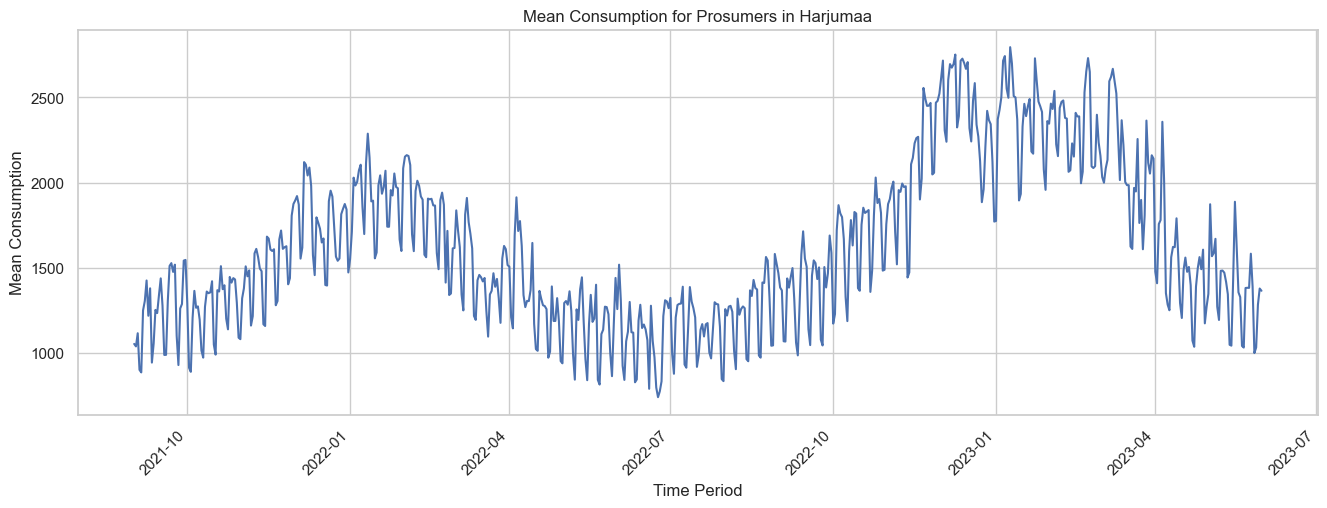

In [22]:
mean_consumption_HA = rslt_df_HA.groupby('date')['consumption'].mean().reset_index()

sns.set_theme(style="whitegrid")
fig = plt.subplots(figsize=(16, 5))
sns.lineplot(data=mean_consumption_HA, x='date', y='consumption', errorbar=None)
plt.xlabel('Time Period')
plt.ylabel('Mean Consumption')
plt.title('Mean Consumption for Prosumers in Harjumaa')
plt.xticks(rotation=45, ha='right') 
plt.show()


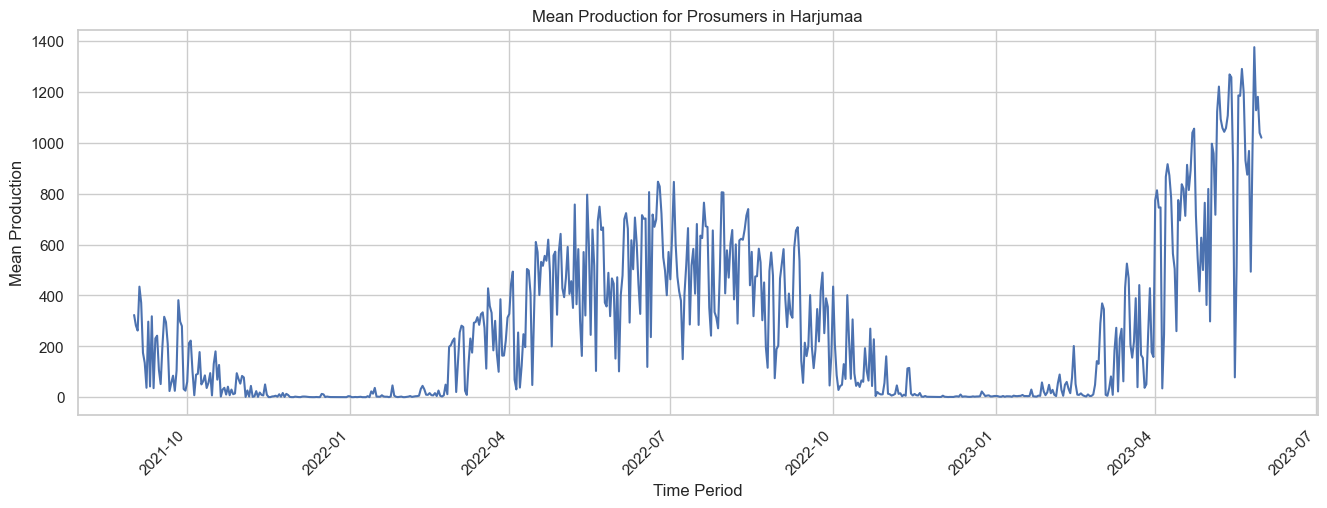

In [27]:
mean_consumption_HA = rslt_df_HA.groupby('date')['production'].mean().reset_index()
sns.set_theme(style="whitegrid")
fig = plt.subplots(figsize=(16, 5))
sns.lineplot(data=mean_consumption_HA, x='date', y='production', errorbar=None)
plt.xlabel('Time Period')
plt.ylabel('Mean Production')
plt.title('Mean Production for Prosumers in Harjumaa')
plt.xticks(rotation=45, ha='right') 
plt.show()

# Selecting Tartumaa

In [24]:
rslt_df_TA = target_data.loc[(target_data['county_name']=='TARTUMAA')]
# rslt_df_HA = target_data.loc[(target_data['county_name']=='HARJUMAA')|(target_data['county_name']=='TARTUMAA')]
# rslt_df_HA = target_data.loc[(target_data['datetime'] >= '2021-12-01') & (rslt_df['datetime'] <= '2022-12-31')]

rslt_df_TA

,county,is_business,product_type,datetime,data_block_id_x,prediction_unit_id,date,time,eic_count,installed_capacity,data_block_id_y,county_name,production,consumption
86,11,0,1,2021-09-01 00:00:00,0,43,2021-09-01,00:00:00,39.0,384.299988,2.0,TARTUMAA,0.000,21.099001
88,11,0,2,2021-09-01 00:00:00,0,44,2021-09-01,00:00:00,8.0,107.500000,2.0,TARTUMAA,0.000,7.620000
90,11,0,3,2021-09-01 00:00:00,0,45,2021-09-01,00:00:00,247.0,2965.270020,2.0,TARTUMAA,0.004,229.602005
92,11,1,1,2021-09-01 00:00:00,0,46,2021-09-01,00:00:00,21.0,822.000000,2.0,TARTUMAA,0.000,228.154999
94,11,1,2,2021-09-01 00:00:00,0,47,2021-09-01,00:00:00,8.0,105.000000,2.0,TARTUMAA,0.000,26.552999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018312,11,0,1,2023-05-31 23:00:00,637,43,2023-05-31,23:00:00,NaN,NaN,NaN,TARTUMAA,1.103,135.613998
2018314,11,0,3,2023-05-31 23:00:00,637,45,2023-05-31,23:00:00,NaN,NaN,NaN,TARTUMAA,10.266,547.731995
2018316,11,1,0,2023-05-31 23:00:00,637,67,2023-05-31,23:00:00,NaN,NaN,NaN,TARTUMAA,0.000,325.266998
2018318,11,1,1,2023-05-31 23:00:00,637,46,2023-05-31,23:00:00,NaN,NaN,NaN,TARTUMAA,0.000,259.266998


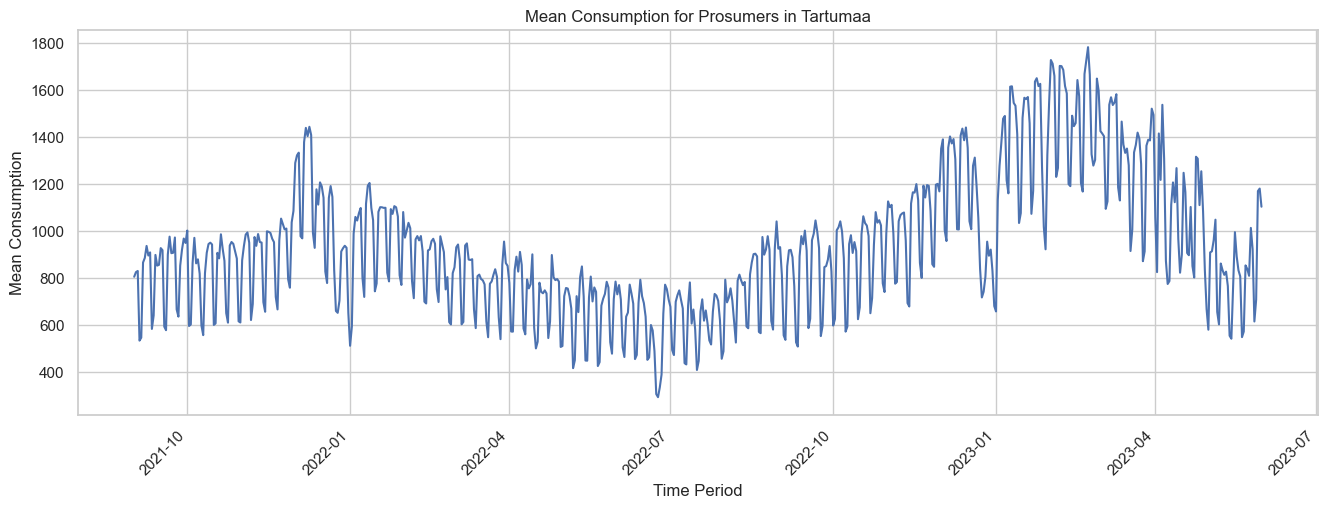

In [25]:
mean_consumption_TA = rslt_df_TA.groupby('date')['consumption'].mean().reset_index()
sns.set_theme(style="whitegrid")
fig = plt.subplots(figsize=(16, 5))
sns.lineplot(data=mean_consumption_TA, x='date', y='consumption', errorbar=None)
plt.xlabel('Time Period')
plt.ylabel('Mean Consumption')
plt.title('Mean Consumption for Prosumers in Tartumaa')
plt.xticks(rotation=45, ha='right') 
plt.show()


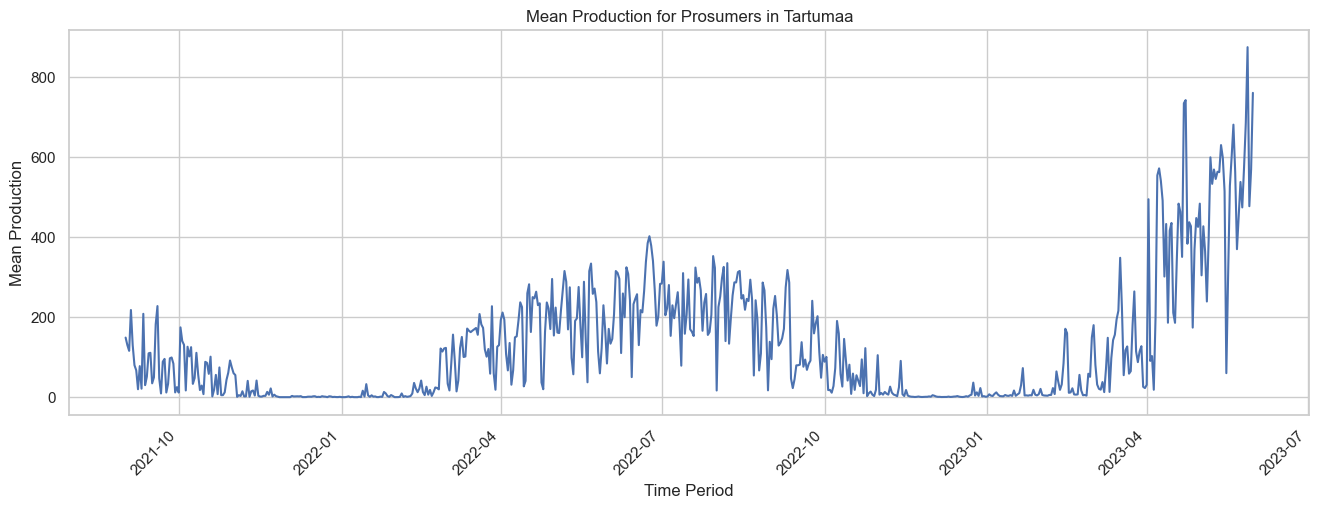

In [26]:
mean_consumption_TA = rslt_df_TA.groupby('date')['production'].mean().reset_index()
sns.set_theme(style="whitegrid")
fig = plt.subplots(figsize=(16, 5))
sns.lineplot(data=mean_consumption_TA, x='date', y='production', errorbar=None)
plt.xlabel('Time Period')
plt.ylabel('Mean Production')
plt.title('Mean Production for Prosumers in Tartumaa')
plt.xticks(rotation=45, ha='right') 
plt.show()
